In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/spi_matches.csv", parse_dates=["date"])

In [3]:
df["result"] = df.apply(
    lambda row: "H" if row.score1 > row.score2 else (
        "D" if row.score1 == row.score2 else "A"), axis=1)


In [4]:
df.head(3)

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.0,1.05,A
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.1,2.10,D
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.1,1.05,H


In [5]:
df["pred"] = df.apply(lambda row: "H" if row.prob1 == max(row.prob1, row.prob2, row.probtie) else (
"D" if row.prob1 == max(row.prob1, row.prob2, row.probtie) else "A"), axis=1)


In [6]:
df.head(3)

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,pred
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,0.0,1.0,0.97,0.63,0.43,0.45,0.0,1.05,A,A
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.0,2.45,0.77,1.75,0.42,2.1,2.10,D,H
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,2.0,1.0,0.85,2.77,0.17,1.25,2.1,1.05,H,A


In [7]:
df[df.prob1 == df.prob2]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,pred
7956,2018-02-17,1843,French Ligue 1,Amiens,Toulouse,45.43,55.78,0.3420,0.3420,0.3160,...,0.0,0.0,0.55,1.12,0.77,0.97,0.00,0.00,D,H
13012,2018-09-15,2412,English League Championship,Millwall,Leeds United,48.39,53.53,0.3574,0.3574,0.2851,...,1.0,1.0,0.92,1.29,2.37,0.96,1.05,1.05,D,H
13272,2018-09-20,1820,UEFA Europa League,Dinamo Zagreb,Fenerbahce,54.97,66.68,0.3560,0.3560,0.2880,...,4.0,1.0,2.57,1.04,2.07,0.97,4.20,1.05,H,H
20147,2019-04-20,1843,French Ligue 1,Reims,St Etienne,57.54,65.62,0.3560,0.3560,0.2880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,H
20296,2019-04-24,1849,Dutch Eredivisie,PEC Zwolle,FC Groningen,30.89,39.74,0.3441,0.3441,0.3118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,H


In [8]:
df[df.prob1 == df.probtie]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,pred
249,2016-09-21,1854,Italy Serie A,Empoli,Internazionale,52.36,71.49,0.2897,0.4206,0.2897,...,0.0,2.0,0.46,1.82,0.84,1.20,0.0,2.1,A,A
8328,2018-03-03,1827,Austrian T-Mobile Bundesliga,St. Pölten,Cashpoint SC Rheindorf Altach,19.74,32.65,0.2996,0.4008,0.2996,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,A,A
14698,2018-10-23,2413,English League One,Doncaster Rovers,Sunderland,24.60,40.39,0.2323,0.5354,0.2323,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,A,A
16121,2018-12-01,2412,English League Championship,Reading,Stoke City,37.67,56.22,0.2660,0.4680,0.2660,...,2.0,2.0,1.10,2.12,1.47,1.77,2.1,2.1,D,A
17051,2018-12-29,2417,Scottish Premiership,Rangers,Celtic,52.06,66.73,0.2615,0.4770,0.2615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A


In [9]:
df[df.prob2 == df.probtie]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,pred
1862,2017-04-15,4582,National Women's Soccer League,Portland Thorns,Orlando Pride,50.27,40.15,0.5617,0.2192,0.2192,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,H,H
2375,2017-05-20,1869,Spanish Primera Division,Deportivo La Coruña,Las Palmas,66.59,62.91,0.4726,0.2637,0.2637,...,3.0,0.0,1.06,0.93,0.21,1.44,3.15,0.00,H,H
3172,2017-08-12,1952,Mexican Primera Division Torneo Apertura,Querétaro,Morelia,37.31,39.32,0.4072,0.2964,0.2964,...,2.0,1.0,1.70,1.18,1.38,0.74,2.10,1.05,H,H
3475,2017-08-25,1869,Spanish Primera Division,Real Sociedad,Villarreal,73.80,73.99,0.4808,0.2596,0.2596,...,3.0,0.0,3.17,0.20,1.77,0.33,3.15,0.00,H,H
7167,2018-01-14,1869,Spanish Primera Division,Espanyol,Athletic Bilbao,66.88,75.32,0.3752,0.3124,0.3124,...,1.0,1.0,0.65,1.24,0.72,0.88,1.05,1.05,D,H
12033,2018-08-18,5641,Argentina Primera Division,Banfield,Gimnasia La Plata,40.99,38.15,0.4388,0.2806,0.2806,...,1.0,0.0,1.70,1.08,0.94,1.21,1.05,0.00,H,H


Only matches played

In [10]:
df_played = df[~df.score1.isnull()]

16 matches have some probabilities that are equal, equates to very little though

In [11]:
16 / len(df_played) * 100

0.09464095587365431

Calcualte % success at home, away, draw

In [12]:
home_wins = df_played[df_played.pred == "H"]

In [13]:
home_wins_correct = df_played[(df_played.result == "H") & (df_played.pred == "H")]

In [14]:
home_correct = len(home_wins_correct) / len(home_wins) * 100

In [15]:
print("Home wins are {}% accurate".format(round(home_correct, 1)))

Home wins are 52.1% accurate


Away

In [16]:
away_wins = df_played[df_played.pred == "A"]

In [17]:
away_wins_correct = df_played[(df_played.result == "A") & (df_played.pred == "A")]

In [18]:
away_correct = len(away_wins_correct) / len(away_wins) * 100

In [19]:
print("Away wins are {}% accurate".format(round(away_correct, 1)))

Away wins are 47.7% accurate


Draw

In [20]:
df_played[df_played.pred == "D"]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,pred


In [21]:
draw = df_played[df_played.pred == "D"]

In [22]:
len(draw)

0

In [23]:
draw_correct = df_played[(df_played.result == "D") & (df_played.pred == "D")]

In [24]:
draw_perc = len(draw_correct) / len(draw) * 100

ZeroDivisionError: division by zero

In [ ]:
print("Draws are {}% accurate".format(round(draw_perc, 1)))

No draw predicted!

In [25]:
correct = df_played[df_played.result == df_played.pred]

In [26]:
total_accuracy = len(correct) / len(df_played) * 100

In [27]:
print("Overall accuracy is {}".format(round(total_accuracy, 1)))

Overall accuracy is 51.0


Breakdown by league

In [28]:
df_played[df_played.result == ""]

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,result,pred


In [29]:
df_played.loc[:, "correct"] = df_played.apply(lambda row: 1 if row["pred"] == row["result"] else 0, axis=1)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
df_by_league = df_played.groupby("league").agg({"correct": ["sum", "count"]}).reset_index()

NameError: name 'df_played' is not defined

In [1]:
df_by_league.columns = df_by_league.columns.droplevel()

NameError: name 'df_by_league' is not defined

In [32]:
df_by_league.columns = ["league", "correct", "total"]

In [33]:
df_by_league["accuracy"] = df_by_league.correct / df_by_league.total

In [34]:
df_by_league.sort_values("accuracy", ascending=False)

,league,correct,total,accuracy
25,Portuguese Liga,263,428,0.614486
16,Greek Super League,68,112,0.607143
17,Italy Serie A,542,930,0.582796
3,Barclays Premier League,547,939,0.582535
34,UEFA Champions League,194,346,0.560694
6,Chinese Super League,71,129,0.550388
1,Australian A-League,24,44,0.545455
20,Major League Soccer,433,799,0.541927
29,Spanish Primera Division,501,926,0.541037
27,Scottish Premiership,183,340,0.538235


let's look at the premier league and MLS first

get 58% correct in EPL. Lawro and merse for comparison

<img src="consensus.png">

In [35]:
df_prem = df_played[df_played.league == "Barclays Premier League"]

In [36]:
total_prem = len(df_prem)

In [37]:
prem_correct = df_prem[df_prem.correct == 1]

In [38]:
prem_home = df_prem[df_prem.pred == "H"]
prem_away = df_prem[df_prem.pred == "A"]
prem_draw = df_prem[df_prem.pred == "D"]

In [39]:
round(len(prem_home[prem_home.correct == 1]) / len(prem_home) * 100, 0)

58.0

In [40]:
round(len(prem_away[prem_away.correct == 1]) / len(prem_away) * 100, 0)

59.0

In [41]:
len(prem_draw)

0

In [42]:
df_prem.date.min()

Timestamp('2016-08-13 00:00:00')

In [43]:
df_prem.date.max()

Timestamp('2018-12-22 00:00:00')

In [44]:
betting = pd.concat([pd.read_csv("../data/1617_results.csv", parse_dates=["Date"], dayfirst=True),
                      pd.read_csv("../data/1718_results.csv", parse_dates=["Date"], dayfirst=True),
                      pd.read_csv("../data/1819_results.csv", parse_dates=["Date"], dayfirst=True)])

In [45]:
betting.Date.min()

Timestamp('2016-08-13 00:00:00')

Check team names

In [46]:
bet_teams = betting.HomeTeam.unique()
sorted(bet_teams)

['Arsenal',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Newcastle',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolves']

In [47]:
five38_teams_16 = df_prem.team1.unique()
sorted(five38_teams_16)

['AFC Bournemouth',
 'Arsenal',
 'Brighton and Hove Albion',
 'Burnley',
 'Cardiff City',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Newcastle',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wolverhampton']

In [48]:
team_dict = {"AFC Bournemouth": "Bournemouth",
            "Brighton and Hove Albion": "Brighton",
            "Cardiff City": "Cardiff",
            "Huddersfield Town": "Huddersfield",
            "Hull City": "Hull",
            "Leicester City": "Leicester",
            "Manchester United": "Man United",
            "Manchester City": "Man City",
            "Newcastle United": "Newcastle",
            "Stoke City": "Stoke",
            "Swansea City": "Swansea",
            "Tottenham Hotspur": "Tottenham",
            "West Bromwich Albion": "West Brom",
            "West Ham United": "West Ham",
            "Wolverhampton": "Wolves"}

In [49]:
df_prem.loc[:, "team1"] = df_prem.team1.apply(lambda x: team_dict[x] if x in team_dict.keys() else x)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
df_prem.loc[:, "team2"] = df_prem.team2.apply((lambda x: team_dict[x] if x in team_dict.keys() else x))

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [51]:
np.setdiff1d(df_prem.team1.unique(), betting.HomeTeam.unique())

array([], dtype=object)

In [52]:
np.setdiff1d(betting.HomeTeam.unique(), df_prem.team1.unique())

array([], dtype=object)

In [53]:
np.setdiff1d(betting.HomeTeam.unique(), betting.AwayTeam.unique())

array([], dtype=object)

In [54]:
np.setdiff1d(df_prem.team1.unique(), df_prem.team2.unique())

array([], dtype=object)

All teams sorted!

In [55]:
len(df_prem)

939

In [56]:
len(betting)

930

In [57]:
betting.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [58]:
merged = pd.merge(betting, df_prem, on=["date", "team1", "team2"])

In [59]:
len(merged)

930

In [60]:
merged.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'team2', 'B365A', 'B365D', 'B365H',
       'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5', 'BbAv>2.5',
       'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5',
       'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU', 'date', 'Div',
       'FTAG', 'FTHG', 'FTR', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG',
       'HTR', 'HY', 'team1', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA',
       'PSCA', 'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee', 'VCA', 'VCD', 'VCH',
       'WHA', 'WHD', 'WHH', 'league_id', 'league', 'spi1', 'spi2', 'prob1',
       'prob2', 'probtie', 'proj_score1', 'proj_score2', 'importance1',
       'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
       'adj_score1', 'adj_score2', 'result', 'pred', 'correct'],
      dtype='object')

In [61]:
merged = merged[["team1", "team2", 
                 "BbMxH", "BbMxD", "BbMxA",
                "PSH", "PSD", "PSA", 
                "result", "pred", "correct", 
                "prob1", "prob2", "probtie"]]

In [62]:
# merged["odds_win_pin"] = 1 / merged.PSH
# merged["odds_away_pin"] = 1 / merged.PSA
# merged["odds_draw_pin"] = 1 / merged.PSD

In [63]:
# merged["odds_win_max"] = 1 / merged.BbMxH
# merged["odds_away_max"] = 1 / merged.BbMxA
# merged["odds_draw_max"] = 1 / merged.BbMxD

In [64]:
merged["odds_home"] = 1 / merged.prob1
merged["odds_away"] = 1 / merged.prob2
merged["odds_draw"] = 1 / merged.probtie

In [65]:
merged["home_diff_pin"] = merged.PSH - merged.odds_home
merged["away_diff_pin"] = merged.PSA - merged.odds_away
merged["draw_diff_pin"] = merged.PSD - merged.odds_draw

In [66]:
merged["home_diff_pin_perc"] = merged.home_diff_pin / merged.prob1 * 100
merged["away_diff_pin_perc"] = merged.away_diff_pin / merged.prob2 * 100
merged["draw_diff_pin_perc"] = merged.draw_diff_pin / merged.probtie * 100

In [67]:
# merged["home_diff_max"] = merged.prob1 - merged.odds_win_max
# merged["away_diff_max"] = merged.prob2 - merged.odds_away_max
# merged["draw_diff_max"] = merged.probtie - merged.odds_draw_max

In [68]:
merged[["PSH", "prob1", "odds_home", "home_diff_pin", "home_diff_pin_perc"]].head(2)

,PSH,prob1,odds_home,home_diff_pin,home_diff_pin_perc
0,2.47,0.4482,2.231147,0.238853,53.291653
1,2.06,0.4214,2.373042,-0.313042,-74.286246


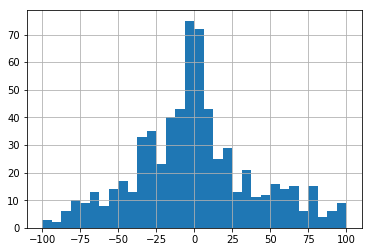

In [69]:
merged.home_diff_pin_perc.hist(bins=32, range=[-100, 100])

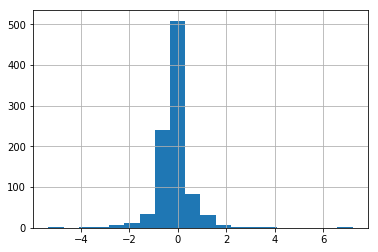

In [70]:
merged.draw_diff_pin.hist(bins=20)

money at end £110.08294998694547
total matches 358
lowest bank £63.138244065389216
highest bank £3865.9228045861864
ROI -4.0%


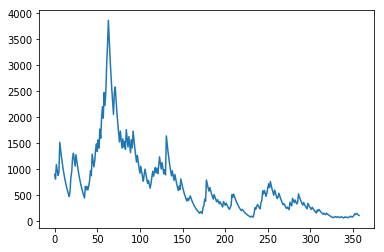

In [76]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in merged[(merged.home_diff_pin_perc > 15)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():cv
    stake = money * percent
    money -= stake
    total_staked += stake
#     print(row)
#     print()
    if row.result == "H":
        money += row.PSH * stake
        total_won += row.PSH * stake
    money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))

money at end of season £0.13402912758057797
total matches 298
lowest bank £0.13402912758057797
highest bank £1675.508814
ROI -22.0%


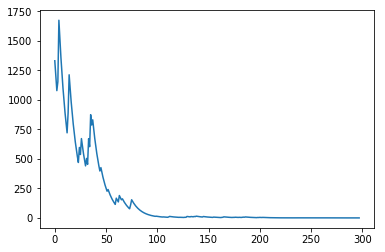

In [75]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
win_odds_record = []
all_odds_record = []
for row in merged[(merged.away_diff_pin_perc > 20)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():cv
    stake = money * percent
    money -= stake
    total_staked += stake
    all_odds_record.append(row.PSA)
#     print(row)
#     print()
    if row.result == "A":
        win_odds_record.append(row.PSA)
        money += row.PSA * stake
        total_won += row.PSA * stake
    money_history.append(money)
plt.plot(money_history)

print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))

money at end of season £0.006708696049505842
total matches 635
lowest bank £0.006708696049505842
highest bank £1684.3920676650469
ROI -9.0%


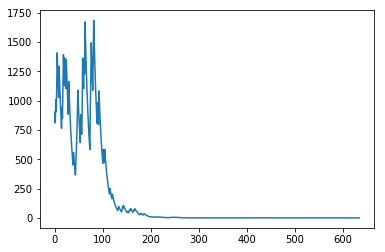

In [79]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
win_odds_record = []
all_odds_record = []
for row in merged[(merged.draw_diff_pin_perc > 20)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():cv
    stake = money * percent
    money -= stake
    total_staked += stake
    all_odds_record.append(row.PSD)
#     print(row)
#     print()
    if row.result == "D":
        win_odds_record.append(row.PSD)
        money += row.PSD * stake
        total_won += row.PSD * stake
    money_history.append(money)
plt.plot(money_history)

print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))

([array([102.,   8.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
           0.]),
  array([237.,  66.,  29.,  25.,  30.,  16.,  15.,   9.,   9.,   2.,   2.,
           2.])],
 array([ 1.18      ,  3.80666667,  6.43333333,  9.06      , 11.68666667,
        14.31333333, 16.94      , 19.56666667, 22.19333333, 24.82      ,
        27.44666667, 30.07333333, 32.7       ]),
 <a list of 2 Lists of Patches objects>)

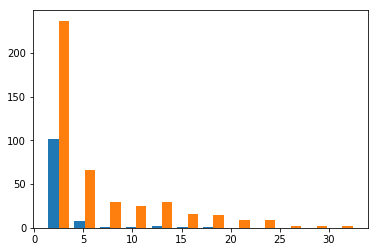

In [91]:
plt.hist([win_odds_record, all_odds_record], bins=12)

money at end of season £391.2266776892837
total matches 172
lowest bank £91.6734053915326
highest bank £1685.70036584305
ROI 5.0%


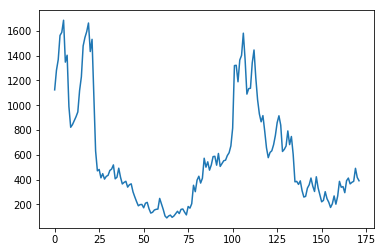

In [92]:
money = 1000
# percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in merged[(merged.home_diff_pin > 0.2)].itertuples():
    kelly = ((row.prob1 * row.PSH) - 1) / ((row.PSH) - 1)
    stake = money * kelly
    money -= stake
    total_staked += stake
#     print(row)
#     print()
    if row.result == "H":
        money += row.PSH * stake
        total_won += row.PSH * stake
    money_history.append(money)
plt.plot(money_history)
print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))

# With Kelly

money at end of season £9088.759106672102
total matches 89
lowest bank £879.6666666666666
highest bank £32790.332537031034
ROI 5.0%


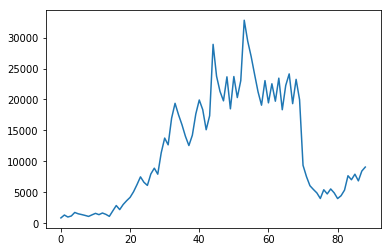

In [74]:
money = 1000
# percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in merged[(merged.home_diff_pin > 0.06)].itertuples():
    kelly = ((row.prob1 * row.PSH) - 1) / ((row.PSH) - 1)
    stake = money * kelly
    money -= stake
    total_staked += stake
#     print(row)
#     print()
    if row.result == "H":
        money += row.PSH * stake
        total_won += row.PSH * stake
    money_history.append(money)
plt.plot(money_history)
print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))

money at end of season £10625.531421826789
total matches 138
lowest bank £660.7772221302249
highest bank £17461.60155638152
ROI 8.0%


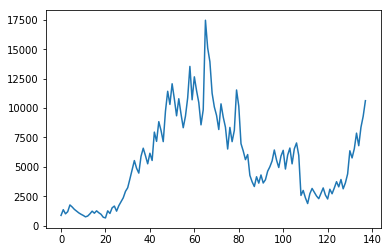

In [75]:
money = 1000
# percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in merged[(merged.home_diff_max > 0.06)].itertuples():
    kelly = ((row.prob1 * row.BbMxH) - 1) / ((row.BbMxH) - 1)
    stake = money * kelly
    money -= stake
    total_staked += stake
#     print(row)
#     print()
    if row.result == "H":
        money += row.BbMxH * stake
        total_won += row.BbMxH * stake
    money_history.append(money)
plt.plot(money_history)
print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))

money at end of season £318.08165062158514
total matches 51
lowest bank £291.59496375107517
highest bank £963.9


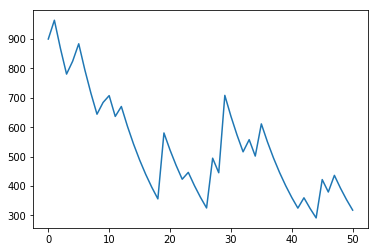

In [465]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in merged[(merged.away_diff > 0.07)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():
    stake = money * percent
    money -= stake
    total_staked += stake
    if row.result == "A":
        money += row.PSA * stake
        total_won += row.PSA * stake
    money_history.append(money)
plt.plot(money_history)
print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))

money at end of season £404.93614884125793
total matches 47
lowest bank £126.82864449222731
highest bank £900.0


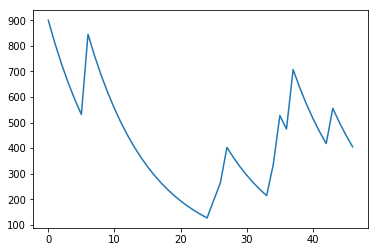

In [446]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in merged[(merged.draw_diff > 0.03)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():
    stake = money * percent
    money -= stake
    total_staked += stake
    if row.result == "D":
        money += row.PSD * stake
        total_won += row.PSD * stake
    money_history.append(money)
plt.plot(money_history)
print("money at end of season £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))

Looks like home wins works out quite well.

Plan of attack:
    
On a daily basis:
1. Download latest 538 info and get odds for next 10 matches
2. ping pinnacle and get odds for next 10 matches
3. compare anything with value over 0.06 in home wins
4. send results with twilio (3p a message)

also look at serie A and portugal